In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv


<div style="background-color:#1c1c1e; color:#f1f1f1; padding:25px; border-radius:12px; font-family:Segoe UI, sans-serif; line-height:1.6">

<h1 style="color:#33d9b2">⚡ Electric Vehicle Specifications 2025 🚘</h1>
<h3 style="color:#74b9ff">📊 Advanced Data Analysis, Stunning Visuals & ML Modeling</h3>

<hr style="border:1px solid #555">

<h2 style="color:#81ecec">📌 Project Highlights</h2>

<ul>
  <li>🔍 <strong>Objective:</strong> Analyze latest EVs using advanced Python tools</li>
  <li>🎯 <strong>Goals:</strong> Understand performance, efficiency & market trends</li>
  <li>🧠 <strong>ML Models:</strong> Predict range (regression) & segment (classification)</li>
  <li>📈 <strong>Visuals:</strong> Radar plots, Violin charts, SHAP explainability, and more</li>
</ul>

<h2 style="color:#fab1a0">📂 Dataset Info</h2>
<ul>
  <li><strong>Source:</strong> <a href="https://www.kaggle.com/datasets/imaadmahmood/electric-vehicle-specifications-dataset-2025" target="_blank" style="color:#55efc4">Kaggle Dataset</a></li>
  <li><strong>Size:</strong> 478 EVs × 22 Features</li>
  <li><strong>Fields:</strong> Range, Battery, Charging, Acceleration, Segment, Dimensions, and more</li>
</ul>

<h2 style="color:#ffeaa7">🧠 Technologies Used</h2>

<table style="width:100%; border-collapse: collapse; color:#f1f1f1">
  <tr><th align="left">🔧 Tool</th><th align="left">⚙️ Purpose</th></tr>
  <tr><td><code>pandas</code></td><td>Data handling & preprocessing</td></tr>
  <tr><td><code>seaborn / plotly</code></td><td>Advanced & interactive visualizations</td></tr>
  <tr><td><code>xgboost</code></td><td>ML model for regression & classification</td></tr>
  <tr><td><code>shap</code></td><td>Explain ML predictions</td></tr>
  <tr><td><code>scikit-learn</code></td><td>Train/test split, scaling, metrics</td></tr>
</table>

<h2 style="color:#ffeaa7">🚀 Key Outcomes</h2>

<ul>
  <li>🔋 Feature engineering: range-per-kWh, charging speed</li>
  <li>📊 Segment insights: compact vs luxury EVs</li>
  <li>🏆 Top EVs by range, performance & specs</li>
  <li>💡 Model explainability with SHAP</li>
</ul>

<p style="margin-top:25px; font-size:15px; color:#b2bec3">
💡 <em>Scroll down to see powerful visualizations and models in action...</em>
</p>

</div>


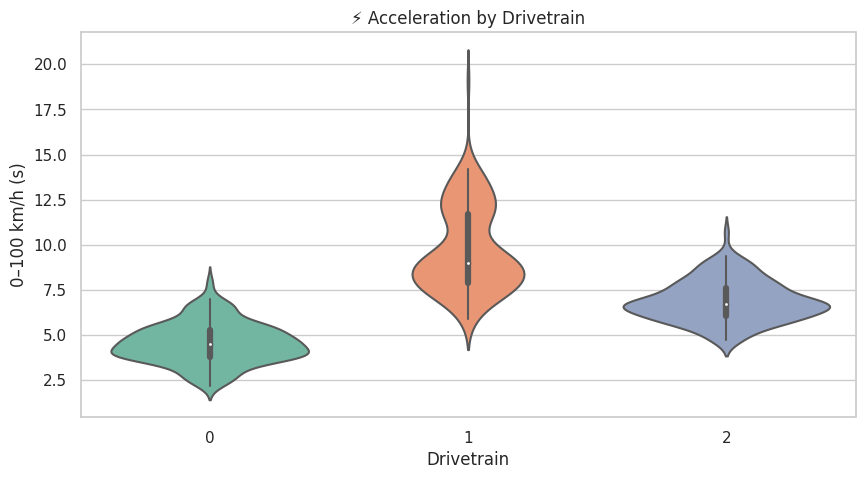

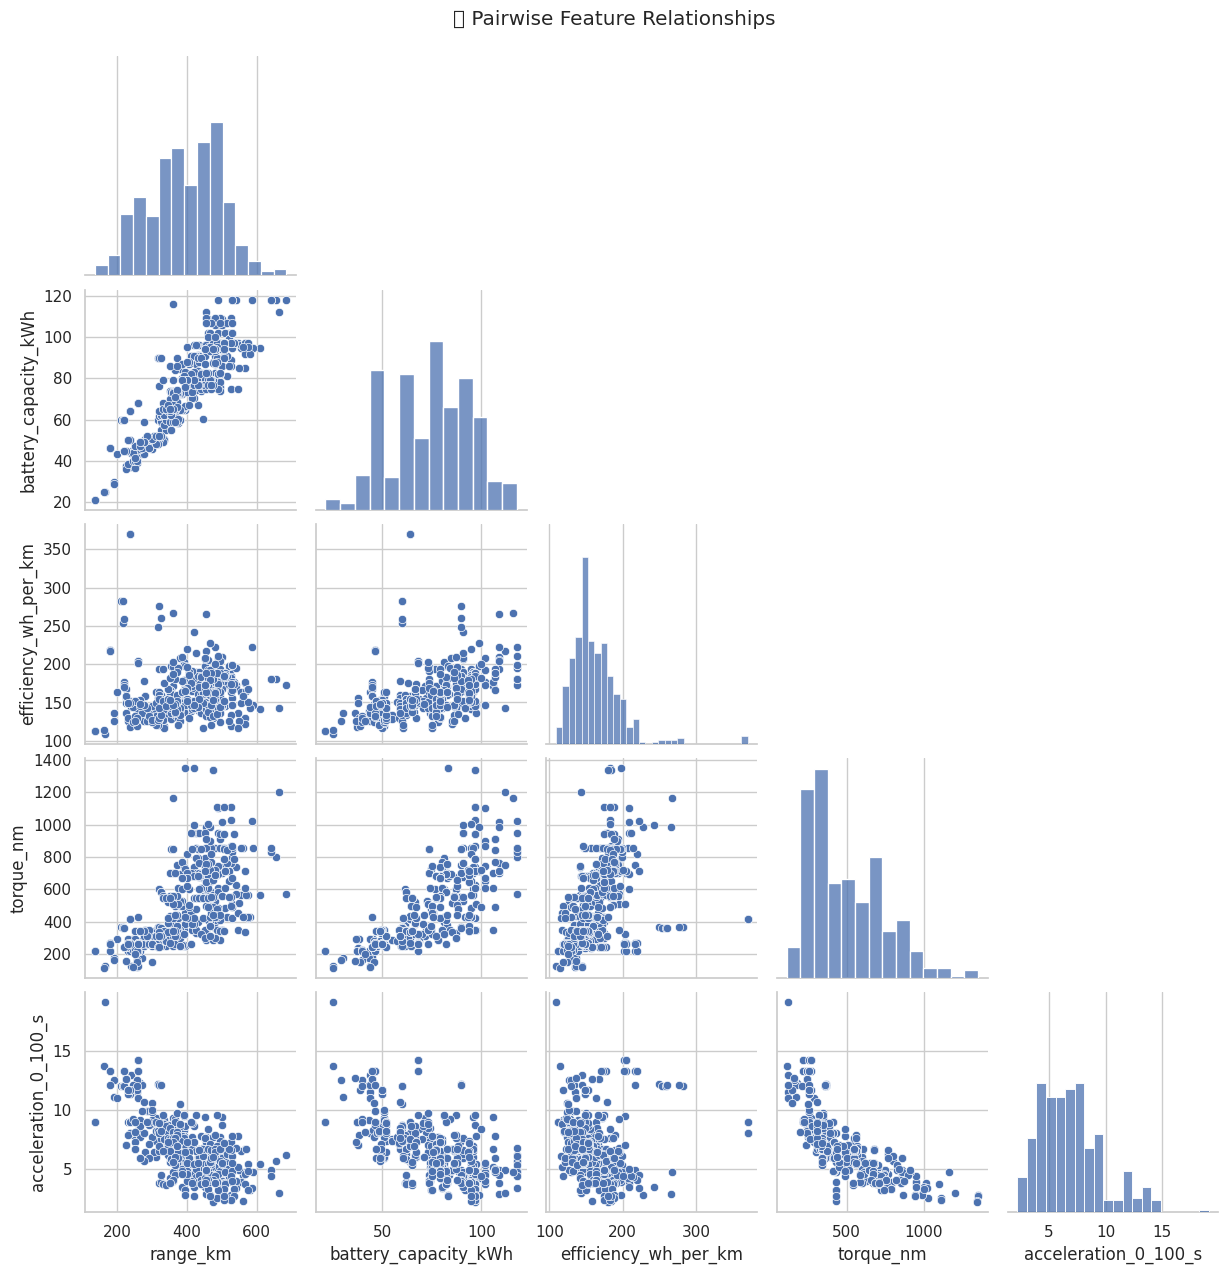

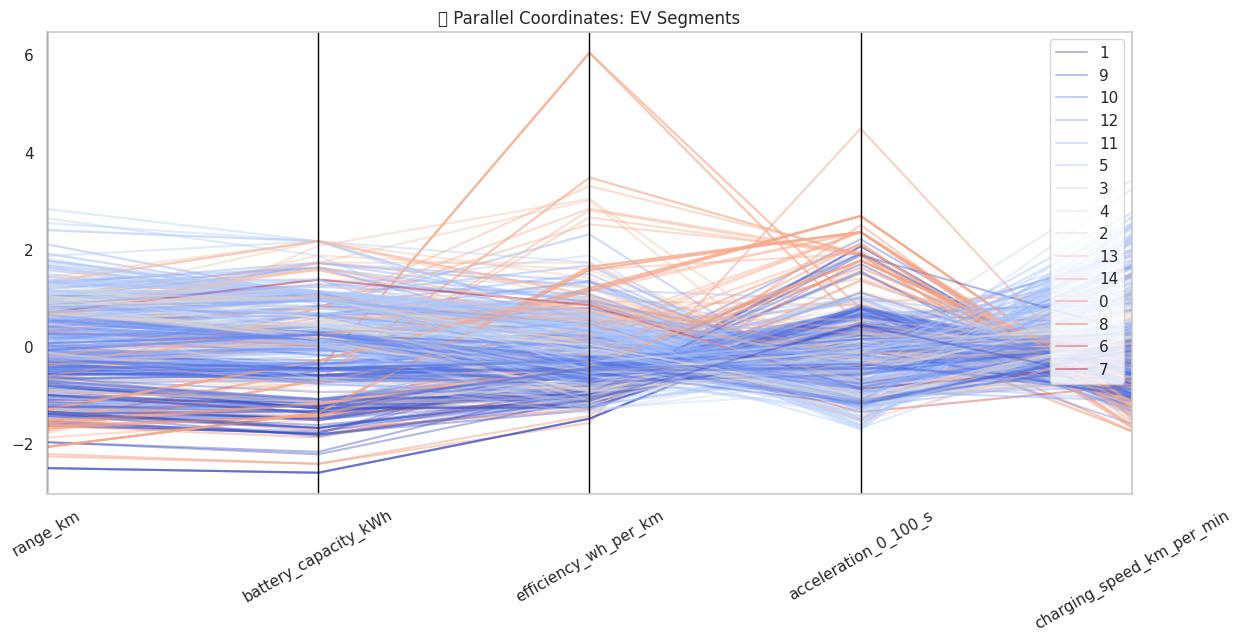


=== 🔧 XGBoost Regression: Range (km) ===
R² Score: 0.97
MSE: 281.61


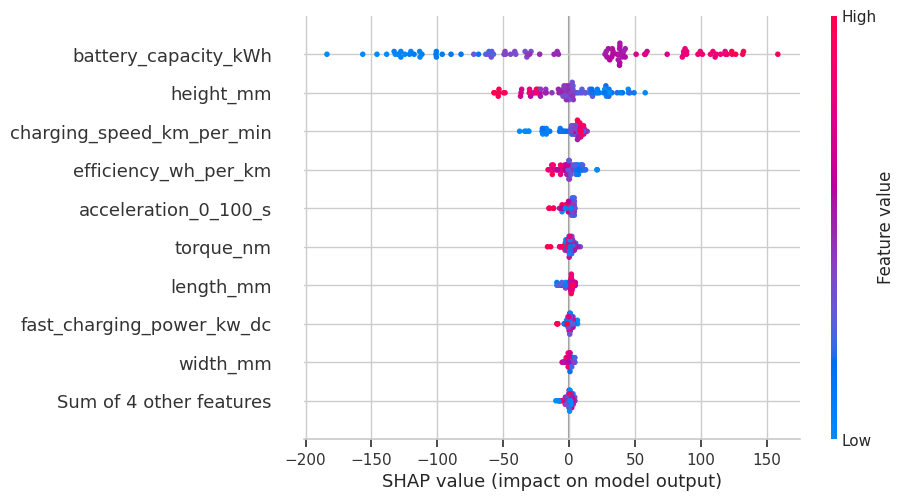


=== 🎯 XGBoost Classification: Segment ===
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.83      1.00      0.91         5
           3       1.00      0.88      0.93         8
           4       1.00      0.67      0.80         6
           5       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       0.94      0.89      0.92        19
          11       0.85      1.00      0.92        11
          12       0.78      1.00      0.88         7
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        11

    accuracy                           0.94        96
   macro avg       0.95      0.94      0.94        96
weighted avg       0.95      0.94      0.94        96


✅ Best XGBoost Params (Regression): {'max_depth': 3, 'n_estimators': 100}


In [5]:
# === ADVANCED EV SPECIFICATIONS ANALYSIS ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import shap
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# === Load Dataset ===
df = pd.read_csv("/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv")

# === Clean Data ===
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'], errors='coerce')
df.fillna({
    'number_of_cells': df['number_of_cells'].median(),
    'fast_charging_power_kw_dc': df['fast_charging_power_kw_dc'].median(),
    'fast_charge_port': df['fast_charge_port'].mode()[0],
    'towing_capacity_kg': 0,
    'cargo_volume_l': df['cargo_volume_l'].median(),
    'torque_nm': df['torque_nm'].median(),
    'model': "Unknown Model"
}, inplace=True)

# === Feature Engineering ===
df['range_per_kwh'] = df['range_km'] / df['battery_capacity_kWh']
df['charging_speed_km_per_min'] = df['fast_charging_power_kw_dc'] * 60 / df['efficiency_wh_per_km']

# === Encode Categorical Variables ===
label_cols = ['drivetrain', 'fast_charge_port', 'car_body_type', 'segment']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# ===================== 📊 ADVANCED VISUALIZATIONS =====================

# 1. Violin Plot - Acceleration by Drivetrain
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='drivetrain', y='acceleration_0_100_s', palette='Set2')
plt.title("⚡ Acceleration by Drivetrain")
plt.ylabel("0–100 km/h (s)")
plt.xlabel("Drivetrain")
plt.show()

# 2. Pairplot - Feature Relationships
sns.pairplot(df[['range_km', 'battery_capacity_kWh', 'efficiency_wh_per_km', 'torque_nm', 'acceleration_0_100_s']], corner=True)
plt.suptitle("🔗 Pairwise Feature Relationships", y=1.02)
plt.show()

# 3. Radar Chart - Top 3 EVs by Range
top3 = df.sort_values(by='range_km', ascending=False).head(3)
fig = go.Figure()
features = ['range_km', 'battery_capacity_kWh', 'efficiency_wh_per_km', 'acceleration_0_100_s', 'charging_speed_km_per_min']
for i, row in top3.iterrows():
    fig.add_trace(go.Scatterpolar(r=row[features].values,
                                  theta=features,
                                  fill='toself',
                                  name=row['model']))
fig.update_layout(title="📡 Spec Comparison (Top 3 EVs by Range)",
                  polar=dict(radialaxis=dict(visible=True)))
fig.show()

# 4. Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
scaled = df.copy()
scaled[features] = StandardScaler().fit_transform(df[features])
scaled['segment_label'] = df['segment']
plt.figure(figsize=(14, 6))
parallel_coordinates(scaled[['segment_label'] + features], 'segment_label', colormap='coolwarm', alpha=0.4)
plt.title("🔀 Parallel Coordinates: EV Segments")
plt.xticks(rotation=30)
plt.show()

# ===================== 🧠 MODELING ENHANCEMENTS =====================

features_model = ['battery_capacity_kWh', 'efficiency_wh_per_km', 'drivetrain',
                  'fast_charging_power_kw_dc', 'car_body_type', 'torque_nm',
                  'acceleration_0_100_s', 'towing_capacity_kg', 'seats',
                  'length_mm', 'width_mm', 'height_mm', 'charging_speed_km_per_min']

X = df[features_model]
y_reg = df['range_km']
y_clf = df['segment']

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# === XGBoost Regression ===
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train_reg)
y_pred_reg = xgb_reg.predict(X_test)

print("\n=== 🔧 XGBoost Regression: Range (km) ===")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.2f}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")

# === SHAP Explainability ===
explainer = shap.Explainer(xgb_reg, X_test)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=10)

# === XGBoost Classification ===
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train_clf)
y_pred_clf = xgb_clf.predict(X_test)

print("\n=== 🎯 XGBoost Classification: Segment ===")
print(classification_report(y_test_clf, y_pred_clf))

# === GridSearchCV for Regression ===
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7]
}
grid = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train_reg)
print("\n✅ Best XGBoost Params (Regression):", grid.best_params_)
